In [24]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from openbabel import openbabel
import pubchempy as pcp
import numpy as np
import py3Dmol
import ipywidgets as widgets
from ipywidgets import interact, fixed, IntSlider, Text, Dropdown, ToggleButton, Button
from IPython.display import display

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
obConv = openbabel.OBConversion()
mol = openbabel.OBMol()

In [ ]:
def is_valid_molecule(molecule):
    smiles = get_smiles_from_name(molecule_name) if not Chem.MolFromSmiles(molecule_name) else molecule_name
    molecule = Chem.MolFromSmiles(smiles)
    return molecule is not None

In [26]:
def view3D(style='line', surface=False):
    view = py3Dmol.view(width=680, height=250, query=cid, viewergrid=(1,1))
    view.setBackgroundColor('#000000', viewer=(0,0))
    view.setStyle({'stick': 'stick', 'line': 'line', 'sphere': 'sphere'}[style])
    if surface:
        view.addSurface(py3Dmol.SAS)
    return view


widget = interact(view3D, 
                 style=Dropdown(
                    options=['line', 'stick', 'sphere'],
                    value='line',
                    description='Style:'),
                 surface=ToggleButton(
                     value=False,
                     description='Surface'))



interactive(children=(Dropdown(description='Style:', options=('line', 'stick', 'sphere'), value='line'), Toggl…

In [10]:
ethanol = nameTOforms('ethanol')
cid = ethanol.cid

In [16]:
def visualize_molecule_3D(name):
    mol = nameTOforms(name)
    view = py3Dmol.view(width=680, height=250, query=mol.cid, viewergrid=(1,3), linked=True)
    view.setStyle({'line': {'linewidth' : 10}}, viewer=(0,0))
    view.setStyle({'stick':{'colorscheme':'cyanCarbon'}}, viewer=(0,1))
    view.setStyle({'sphere': {}}, viewer=(0,2))

    view.setBackgroundColor('#ebf4fb', viewer=(0,0))
    view.setBackgroundColor('#cda9fc', viewer=(0,1))
    view.setBackgroundColor('#ebf4fb', viewer=(0,2))
    return view

In [17]:
visualize_molecule_3D('ethanol')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [17]:
def visualize_molecule(name):
    mol = nameTOforms(name)
    smiles = mol.smiles if not Chem.MolFromSmiles(name) else name
    molecule = Chem.MolFromSmiles(smiles)
    if molecule:
        # Generate a 2D structure for the molecule
        Chem.rdDepictor.Compute2DCoords(molecule)
        # Draw the molecule
        img = Draw.MolToImage(molecule)
        return img
    else:
        print(f"The molecule name '{molecule_name}' is not valid.")
        return None

[17:48:47] SMILES Parse Error: syntax error while parsing: ethanol
[17:48:47] SMILES Parse Error: Failed parsing SMILES 'ethanol' for input: 'ethanol'


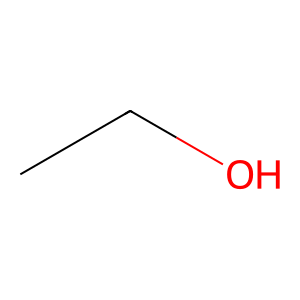

In [18]:
visualize_molecule('ethanol')

In [ ]:
        if isinstance(self, (float,int)):
            raise ValueError(  
                f"Invalid input: '{self}'."
                " Input valid SMILES"
            )

        try:
            smi = str(self)
        
        except ValueError:     
            raise ValueError(  
                f"Invalid input: '{self}'."
                " `SMILES` must be a string, or convertible to a string."
                f" Original error message: {e}"
            )

        except IndexError:
            return None

In [6]:
class nameTOforms:
    """A class to convert from name to other useful formats and identifiers"""
    def __init__(self, name: str):
        """Initializes the name"""
        self.name = name
        self.smiles = self.nameTOsmi()
        self.sdf = self.smiTOsdf()
        self.ick = self.smiTOick()
        self.ic = self.smiTOic()
        self.zmat = self.smiTOzmat()
        self.xyz = self.smiTOxyz()
        self.cid = self.nameTOcid()

    def nameTOsmi(self):
        """Get SMILES of molecule from name"""
        try:
            c = pcp.get_compounds(self.name, 'name')
            return c[0].isomeric_smiles
        except IndexError:
            return None

    def nameTOcid(self):
        """Get cid of molecule from name"""
        c = pcp.get_cids(self.name, 'name', list_return='flat')
        return c[0]

    def smiTOsdf(self):
        """Get SDF of molecule from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        c = smi[0]
        cid = c.cid
        sdf = pcp.get_sdf(cid)
        return sdf

    def smiTOick(self):
        """Get InChiKey from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        return smi[0].inchikey

    def smiTOic(self):
        """Get InChi from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        return smi[0].inchi

    def smiTOzmat(self):
        """Get z-matrix from SDF"""
        obConv.SetInAndOutFormats("sdf", "gzmat")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

    def smiTOxyz(self):
        """Get xyz from SDF"""
        obConv.SetInAndOutFormats("sdf", "xyz")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

In [7]:
class icTOforms:
    """A class to convert from InChi to other useful formats and identifiers"""
    def __init__(self, InChi: str):
        """Initializes an InChi and its common name"""
        self.ic = InChi
        self.name = self.icTOname()
        self.sdf = self.icTOsdf()
        self.ick = self.icTOick()
        self.smiles = self.icTOsmi()
        self.zmat = self.icTOzmat()
        self.xyz = self.icTOxyz()

    def icTOname(self):
        """Get name of molecule from InChi"""
        try:
            ic = pcp.get_compounds(self.ic, 'inchi')
            return ic[0].iupac_name
        except IndexError:
            return None

    def icTOsdf(self):
        """Get SDF of molecule from InChi"""
        ic = pcp.get_compounds(self.ic, 'inchi')
        c = ic[0]
        cid = c.cid
        sdf = pcp.get_sdf(cid)
        return sdf

    def icTOick(self):
        """Get InChiKey from InChi"""
        ic = pcp.get_compounds(self.ic, 'inchi')
        return ic[0].inchikey

    def icTOsmi(self):
        """Get SMILES from InChi"""
        ic = pcp.get_compounds(self.ic, 'inchi')
        return ic[0].isomeric_smiles

    def icTOzmat(self):
        """Get z-matrix from SDF"""
        obConv.SetInAndOutFormats("sdf", "gzmat")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

    def icTOxyz(self):
        """Get xyz from SDF"""
        obConv.SetInAndOutFormats("sdf", "xyz")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

In [8]:
class ickTOforms:
    """A class to convert from InChiKey to other useful formats and identifiers"""
    def __init__(self, InChiKey: str):
        """Initializes an InChiKey and its common name"""
        self.ick = InChiKey
        self.name = self.ickTOname()
        self.sdf = self.ickTOsdf()
        self.ic = self.ickTOic()
        self.smiles = self.ickTOsmi()
        self.zmat = self.ickTOzmat()
        self.xyz = self.ickTOxyz()

    def ickTOname(self):
        """Get name of molecule from InChiKey"""
        try:
            ick = pcp.get_compounds(self.ick, 'inchikey')
            return ick[0].iupac_name
        except IndexError:
            return None

    def ickTOsdf(self):
        """Get SDF of molecule from InChiKey"""
        ick = pcp.get_compounds(self.ick, 'inchikey')
        c = ick[0]
        cid = c.cid
        sdf = pcp.get_sdf(cid)
        return sdf

    def ickTOic(self):
        """Get InChi from InChiKey"""
        ick = pcp.get_compounds(self.ick, 'inchikey')
        return ick[0].inchi

    def ickTOsmi(self):
        """Get SMILES from InChiKey"""
        ick = pcp.get_compounds(self.ick, 'inchikey')
        return ick[0].isomeric_smiles

    def ickTOzmat(self):
        """Get z-matrix from SDF"""
        obConv.SetInAndOutFormats("sdf", "gzmat")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

    def ickTOxyz(self):
        """Get xyz from SDF"""
        obConv.SetInAndOutFormats("sdf", "xyz")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

In [9]:
class smiTOforms:
    """A class to convert from SMILES to other useful formats and identifiers"""
    def __init__(self, SMILES: str):
        """Initializes a SMILES and its common name"""
        self.smiles = SMILES
        self.name = self.smiTOname()
        self.sdf = self.smiTOsdf()
        self.ick = self.smiTOick()
        self.ic = self.smiTOic()
        self.zmat = self.smiTOzmat()
        self.xyz = self.smiTOxyz()

    def smiTOname(self):
        """Get name of molecule from SMILES"""
        try:
            smi = pcp.get_compounds(self.smiles, 'smiles')
            return smi[0].iupac_name
        except IndexError:
            return None

    def smiTOsdf(self):
        """Get SDF of molecule from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        c = smi[0]
        cid = c.cid
        sdf = pcp.get_sdf(cid)
        return sdf

    def smiTOick(self):
        """Get InChiKey from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        return smi[0].inchikey

    def smiTOic(self):
        """Get InChi from SMILES"""
        smi = pcp.get_compounds(self.smiles, 'smiles')
        return smi[0].inchi

    def smiTOzmat(self):
        """Get z-matrix from SDF"""
        obConv.SetInAndOutFormats("sdf", "gzmat")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)

    def smiTOxyz(self):
        """Get xyz from SDF"""
        obConv.SetInAndOutFormats("sdf", "xyz")
        obConv.ReadString(mol, self.sdf)
        return obConv.WriteString(mol)